In [ ]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader


from sklearn.model_selection import train_test_split

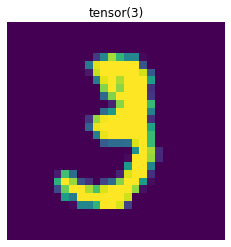

In [ ]:
from tensorflow.keras.datasets import mnist


(features_train, targets_train), (features_test, targets_test) = #Load MNIST DATASET

# Convert to float32.

features_train, features_test = np.array(features_train, np.float32), np.array(features_test, np.float32)

# Flatten images to 1-D vector of 784 features (28*28).
num_features=784

features_train, features_test = #Use reshape function

# Normalize images value from [0, 255] to [0, 1].

features_train, features_test = features_train / 255., features_test / 255

# create feature and targets tensor for train set. 
#As you remember we need variable to accumulate gradients. 
#Therefore first we create tensor, then we will create variable

featuresTrain = #####
targetsTrain = ####

# create feature and targets tensor for test set.
featuresTest = #######
targetsTest = #######

# batch_size, epoch and iteration
batch_size = 100
n_iters = 5000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(featuresTrain[10].reshape(28,28))
plt.axis("off")
plt.title(str(targetsTrain[10]))
plt.savefig('graph.png')
plt.show()



In [ ]:
# Create ANN Model
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        # Linear function 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 150 --> 150
        self.fc2 = ##########
        # Non-linearity 2 : Tanh
        self.tanh2 = ##########
        
        # Linear function 3: 150 --> 150
        self.fc3 = ######
        # Non-linearity 3 ReLU
        self.elu3 = #####
        
        # Linear function 4 (readout): 150 --> ?????????
        self.fc4 = #####  
    
    def forward(self, x):
        # Linear function 1
        
        # Non-linearity 1
        
        
        # Linear function 2
        
        # Non-linearity 2
        
        
        # Linear function 2
        
        # Non-linearity 2
        
        
        # Linear function 4 (readout)
        
        return out

# instantiate ANN
input_dim = 28*28

#hidden layer dim is one of the hyper parameter and it should be chosen and tuned.
hidden_dim = 150 

output_dim = ####

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and cross entropy loss
        
        
        # Calculating gradients
        
        
        # Update parameters
        
        

        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0

            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)

        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.8664252758026123  Accuracy: 76.36000061035156 %
Iteration: 1000  Loss: 0.5220181345939636  Accuracy: 87.97000122070312 %
Iteration: 1500  Loss: 0.5908574461936951  Accuracy: 89.4800033569336 %
Iteration: 2000  Loss: 0.30962106585502625  Accuracy: 91.05000305175781 %
Iteration: 2500  Loss: 0.21108151972293854  Accuracy: 91.97000122070312 %
Iteration: 3000  Loss: 0.2924019694328308  Accuracy: 92.77999877929688 %
Iteration: 3500  Loss: 0.2400687336921692  Accuracy: 93.51000213623047 %
Iteration: 4000  Loss: 0.25644558668136597  Accuracy: 94.08999633789062 %
Iteration: 4500  Loss: 0.35884109139442444  Accuracy: 94.25 %


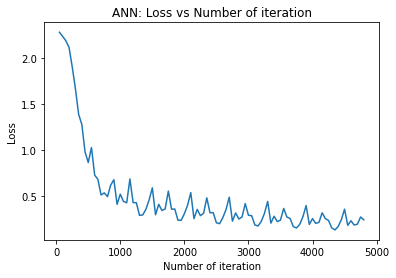

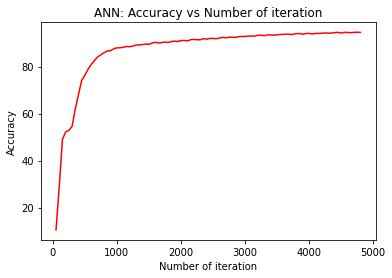

In [ ]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

Try ANN on "Fruits" dataset. Modify number of layers and observe the performance difference: 
https://www.kaggle.com/moltean/fruits


Or (In a case if you don't have that much dataPack available, download 20 images of apple and 20 images of orange from the internet and work on it
with RANDOM state=Rollnumber stratergy, 80-20% training-testing division)




